<h1 style="color: #FF5733; font-size: 56px;"> Cyber Bullying prevention</h1>

<h1 style="color: pink; font-size: 36px;">Digital Defender: Game Wrangling and Analysis File</h1>

<h1 style="color: green; font-size: 19px;"> Data details

This script uses the os and pandas libraries to manage and process multiple CSV files stored in the same directory. It iterates over a list of CSV filenames, reads each file into a pandas DataFrame, and then prints essential details such as column names, data types, the shape of the DataFrame, and a preview of the first few rows. If a file can’t be read due to an error, the code prints an error message and continues with the next file, ensuring a clear separation between the outputs of each file. This setup provides a quick and efficient way to explore and understand the structure and content of your CSV data.

In [8]:
import os
import pandas as pd

# List of CSV file names present in the folder.
csv_file_list = [
    "aggression_parsed_dataset.csv",
    "attack_parsed_dataset.csv",
    "Cyberbullying_Dataset_Summary_Table__Detailed_.csv",
    "kaggle_parsed_dataset.csv",
    "twitter_sexism_parsed_dataset.csv",
    "twitter_racism_parsed_dataset.csv",
    "twitter_parsed_dataset.csv",
    "toxicity_parsed_dataset.csv",
    "youtube_parsed_dataset.csv",
    "Aggressive_All.csv",
    "Non_Aggressive_All.csv"

]

# Loop through each CSV file in the list.
for file_name in csv_file_list:
    # Since the CSV files are in the same folder as the notebook,
    # the file path is simply the file name.
    file_path = os.path.join(file_name)
    
    # Print header for current file processing.
    print(f"=== Processing File: {file_name} ===")
    
    # Try to read the CSV file into a pandas DataFrame.
    try:
        data_frame = pd.read_csv(file_path)
    except Exception as error:
        print(f"Error reading {file_name}: {error}")
        print("-" * 60 + "\n")
        continue  # Skip to the next file if an error occurs.
    
    # Display the column names of the DataFrame.
    print("Column Names:")
    print(data_frame.columns.tolist())
    
    # Display the data types of each column.
    print("\nData Types:")
    print(data_frame.dtypes)
    
    # Display the number of rows and columns in the DataFrame.
    num_rows, num_columns = data_frame.shape
    print(f"\nNumber of Rows: {num_rows}")
    print(f"Number of Columns: {num_columns}")
    
    # Display the first 5 rows of the DataFrame as a preview.
    print("\nFirst 5 Rows:")
    print(data_frame.head())
    
    # Print a separator line after processing each file.
    print("\n" + "-" * 60 + "\n")

=== Processing File: aggression_parsed_dataset.csv ===
Column Names:
['index', 'Text', 'ed_label_0', 'ed_label_1', 'oh_label']

Data Types:
index           int64
Text           object
ed_label_0    float64
ed_label_1    float64
oh_label        int64
dtype: object

Number of Rows: 115864
Number of Columns: 5

First 5 Rows:
   index                                               Text  ed_label_0  \
0      0  `- This is not ``creative``.  Those are the di...    0.900000   
1      1  `  :: the term ``standard model`` is itself le...    1.000000   
2      2    True or false, the situation as of March 200...    1.000000   
3      3   Next, maybe you could work on being less cond...    0.555556   
4      4               This page will need disambiguation.     1.000000   

   ed_label_1  oh_label  
0    0.100000         0  
1    0.000000         0  
2    0.000000         0  
3    0.444444         0  
4    0.000000         0  

------------------------------------------------------------

=== Pr

<h1 style="color: green; font-size: 19px;"> Data wrangling

The script begins by loading the CSV file into a DataFrame, which serves as the initial dataset. It then checks for duplicate rows by counting and printing their number, and subsequently removes any duplicates found. In addition, the script identifies rows that are entirely empty—meaning all values are missing—counts and prints these empty rows, and removes them from the DataFrame. Finally, it saves the cleaned DataFrame to a new CSV file, ensuring that all modifications are preserved.

In [ ]:
import pandas as pd

# Specify the file name (update with your file name)
file_name = 'your_file.csv' #put the file we want to check 

# Load the CSV file into a DataFrame
df = pd.read_csv(file_name)

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Found {num_duplicates} duplicate rows.")

# Remove duplicate rows, if any
if num_duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicate rows have been removed.")

# Check for empty rows (rows where all cells are NaN)
num_empty_rows = df.isnull().all(axis=1).sum()
print(f"Found {num_empty_rows} empty rows.")

# Remove empty rows, if any
if num_empty_rows > 0:
    df = df.dropna(how='all')
    print("Empty rows have been removed.")

# Save the cleaned DataFrame to a new CSV file
clean_file_name = 'your_file_cleaned.csv'# 
df.to_csv(clean_file_name, index=False)
print(f"Cleaned data has been saved to {clean_file_name}.")

In [ ]:
import pandas as pd
import os

# --------------------- Helper Function ---------------------
def clean_text(text):
    """Cleans input text by lowercasing it and removing extra whitespace."""
    if pd.isnull(text):
        return ""
    text = str(text).lower()          # Convert to lowercase
    text = " ".join(text.split())     # Remove extra spaces/newlines
    return text

# --------------------- File & Column Mapping ---------------------
# Dictionary mapping each file name to the list of text columns to clean.
file_info = {
    "aggression_parsed_dataset.csv": ["Text"],
    "attack_parsed_dataset.csv": ["Text"],
    "toxicity_parsed_dataset.csv": ["Text"],
    "Aggressive_All.csv": ["Message"],
    "Non_Aggressive_All.csv": ["Message"]
}

# --------------------- Processing Each File ---------------------
for file_name, text_columns in file_info.items():
    if os.path.exists(file_name):
        print(f"Processing file: {file_name}")
        df = pd.read_csv(file_name)
        
        # Process each text column specified for this file
        for col in text_columns:
            if col in df.columns:
                # Remove rows where the column is missing or empty
                df = df[~(df[col].isnull() | (df[col].astype(str).str.strip() == ""))]
                # Clean the column
                df[col] = df[col].apply(clean_text)
            else:
                print(f"Warning: Column '{col}' not found in {file_name}")

        # Save the cleaned DataFrame to a new CSV file
        new_file_name = file_name.replace(".csv", "") + "_cleaned.csv"
        df.to_csv(new_file_name, index=False, encoding="utf-8")
        print(f"Saved cleaned file: {new_file_name}\n")
    else:
        print(f"File {file_name} does not exist.\n")


Statistical analysis

In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------- Aggression, Attack, and Toxicity Datasets ---------------------
# Load the CSV files
df_aggression = pd.read_csv("aggression_parsed_dataset.csv")
df_attack = pd.read_csv("attack_parsed_dataset.csv")
df_toxicity = pd.read_csv("toxicity_parsed_dataset.csv")

# For these datasets, we use the "ed_label_0" column (ensure it is numeric)
df_aggression["ed_label_0"] = pd.to_numeric(df_aggression["ed_label_0"], errors='coerce')
df_attack["ed_label_0"]     = pd.to_numeric(df_attack["ed_label_0"], errors='coerce')
df_toxicity["ed_label_0"]   = pd.to_numeric(df_toxicity["ed_label_0"], errors='coerce')

# Remove any missing values from ed_label_0
group_aggression = df_aggression["ed_label_0"].dropna()
group_attack     = df_attack["ed_label_0"].dropna()
group_toxicity   = df_toxicity["ed_label_0"].dropna()

# Print descriptive statistics
print("Descriptive Statistics for 'ed_label_0':\n")
print("Aggression Dataset:")
print(group_aggression.describe())
print("\nAttack Dataset:")
print(group_attack.describe())
print("\nToxicity Dataset:")
print(group_toxicity.describe())

# --------------------- One-Way ANOVA Test ---------------------
f_stat, p_val = stats.f_oneway(group_aggression, group_attack, group_toxicity)
print("\nOne-Way ANOVA Results on 'ed_label_0':")
print(f"  F-statistic = {f_stat:.3f}")
print(f"  p-value = {p_val:.3f}")

# --------------------- Boxplot Visualization ---------------------
# Combine the three groups in a single DataFrame for plotting
data = pd.concat([group_aggression, group_attack, group_toxicity], axis=0)
group_labels = (["Aggression"] * len(group_aggression)) + \
               (["Attack"] * len(group_attack)) + \
               (["Toxicity"] * len(group_toxicity))
df_plot = pd.DataFrame({"ed_label_0": data, "Dataset": group_labels})

plt.figure(figsize=(8, 6))
sns.boxplot(x="Dataset", y="ed_label_0", data=df_plot, palette="Set2")
plt.title("Distribution of 'ed_label_0' Across Datasets")
plt.xlabel("Dataset")
plt.ylabel("ed_label_0")
plt.show()



# --------------------- YouTube Parsed Dataset ---------------------
df_youtube = pd.read_csv("youtube_parsed_dataset.csv")
print("\n=== YouTube Parsed Dataset ===")
print("Column Names:", df_youtube.columns.tolist())

# For example, examine descriptive statistics for 'Age'
df_youtube["Age"] = pd.to_numeric(df_youtube["Age"], errors='coerce')
print("Descriptive Statistics for 'Age':")
print(df_youtube["Age"].describe())

# And examine correlation between 'Age' and 'Number of Comments'
df_youtube["Number of Comments"] = pd.to_numeric(df_youtube["Number of Comments"], errors='coerce')
corr, p_val_corr = stats.pearsonr(df_youtube["Age"].dropna(), df_youtube["Number of Comments"].dropna())
print("\nPearson Correlation between Age and Number of Comments:")
print(f"  Correlation = {corr:.3f}")
print(f"  p-value = {p_val_corr:.3f}")

# Optional: Scatter plot of Age vs. Number of Comments
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Number of Comments", data=df_youtube, alpha=0.7)
plt.title("Scatter Plot: Age vs. Number of Comments")
plt.xlabel("Age")
plt.ylabel("Number of Comments")
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import chisquare

# Load the CB Multi-Labeled Balanced Dataset
df_cb = pd.read_csv("cb_multi_labeled_balanced.csv")

print("=== CB Multi-Labeled Balanced Dataset ===")
print("Column Names:", df_cb.columns.tolist())
print("Descriptive Statistics (Label counts):")
print(df_cb["label"].value_counts())

# Create the contingency counts: observed frequencies for each label.
observed = df_cb["label"].value_counts().sort_index()
# For a goodness-of-fit test, we assume a uniform distribution:
expected = [observed.sum() / len(observed)] * len(observed)

# Perform chi-square goodness-of-fit test
chi2, p_val = chisquare(f_obs=observed, f_exp=expected)
print("\nChi-Square Goodness-of-Fit Test for 'label':")
print(f"  Chi-square Statistic = {chi2:.3f}")
print(f"  p-value = {p_val:.3f}")


<h1 style="color: #FF5733; font-size: 19px;">Natural language processing  and analysis in file 

Overview of the Process

In our pipeline, we began by loading and preprocessing a cleaned CSV file containing messages. We removed any rows with empty messages and standardized the text by converting it to lowercase and stripping extra whitespace. This ensured that our subsequent analysis was performed on a consistent and high-quality dataset.

Emotion Analysis Approaches

We employed two distinct emotion analysis methods. First, we used a lexicon-based approach with NRCLex. NRCLex utilizes the NRC Emotion Lexicon, which maps words to basic emotions such as anger, fear, joy, sadness, and disgust. By analyzing the frequency of these emotion-related words in a message, NRCLex returns a list of top emotions with their associated scores. This method is fast and interpretable, providing a straightforward snapshot of the emotional cues in the text.

In addition, we applied a transformer-based approach using a pretrained model, specifically “bhadresh-savani/distilbert-base-uncased-emotion”. This model is a distilled version of BERT that has been fine-tuned for emotion classification. It predicts multiple emotion categories—such as anger, joy, sadness, fear, love, and surprise—by returning a probability distribution over these labels for each message. We chose this model because DistilBERT is lighter and faster than the full BERT model while maintaining strong performance, and because it offers a detailed, probability-based classification that can capture nuanced emotional content.

Creating the Trigger Column

After obtaining the transformer-based emotion predictions, we created an additional column labeled “trigger.” This column identifies the dominant emotion for each message by selecting the emotion with the highest probability from the transformer’s output. This trigger word serves as an immediate indicator of the primary emotional signal in a message, which can be very useful for further analysis or for developing interactive tools such as quizzes aimed at cyber bullying prevention.

Saving the Results

Finally, the enriched DataFrame—now containing the original messages, NRCLex emotion outputs, transformer-based emotion probabilities, and the trigger column—is saved in both CSV and JSON formats. The CSV file offers ease of use for further data manipulation or viewing in spreadsheet applications, while the JSON format is ideal for integration with web-based applications and interactive educational tools.

By combining these methods, we achieve a comprehensive understanding of the emotional content in each message, enabling more informed analysis and effective strategies for cyber bullying prevention and educational initiatives.

In [ ]:
import pandas as pd
import nltk
from nrclex import NRCLex
from transformers import pipeline
import textwrap
import torch
import os
import multiprocessing as mp
import logging

# Set logging level for transformers to suppress informational messages
logging.getLogger("transformers").setLevel(logging.ERROR)

# Verify PyTorch installation
print("Installed PyTorch version:", torch.__version__)
print("Number of GPUs available:", torch.cuda.device_count())

# Download necessary NLTK data (if needed)
nltk.download('vader_lexicon')

# ------------------- Load and Preprocess Data -------------------
file_name = "Aggressive_All_cleaned.csv"
df = pd.read_csv(file_name)
print("Columns in dataset:", df.columns.tolist())

# Remove rows where 'Message' is missing or empty
df = df[~(df['Message'].isnull() | (df['Message'].astype(str).str.strip() == ""))]
print("Number of rows after cleaning empty messages:", len(df))

# Standardize messages: convert to lowercase and strip extra whitespace
df['Message'] = df['Message'].astype(str).str.lower().str.strip()

# ------------------- Define Emotion Analysis Functions -------------------

def get_nrc_emotions(text):
    """
    Uses NRCLex to analyze the text and returns the top emotions as a list of (emotion, score) tuples.
    """
    emotion_obj = NRCLex(text)
    return emotion_obj.top_emotions

def convert_transformer_results(results):
    """Convert a list of dictionaries to a single dictionary mapping emotion labels to scores."""
    return {item['label']: item['score'] for item in results}

def process_batch(batch):
    """
    Processes a batch of messages using the transformer pipeline.
    Each process initializes its own pipeline instance.
    """
    # Initialize the pipeline inside each process using CPU (change device=0 if using GPU)
    emotion_classifier = pipeline(
        "text-classification", 
        model="bhadresh-savani/distilbert-base-uncased-emotion", 
        framework="pt",        # explicitly use PyTorch
        device=-1,             # use CPU; change to device=0 if GPU is available
        top_k=None,            # equivalent to return_all_scores=True
        truncation=True        # truncate texts longer than model's max length
    )
    results = emotion_classifier(batch)
    # Convert each result (a list of dictionaries) into a single dictionary
    processed = [convert_transformer_results(result) for result in results]
    return processed

# ------------------- Parallel Processing for Transformer Emotions -------------------
def main():
    # For faster experimentation, you can sample a subset (remove or adjust sampling as needed)
    sample_size = 5000  # change or remove to process full dataset
    df_sample = df.sample(n=sample_size, random_state=42)
    messages = df_sample['Message'].tolist()
    
    batch_size = 32  # adjust based on your hardware
    batches = [messages[i:i+batch_size] for i in range(0, len(messages), batch_size)]
    
    print(f"Total messages in sample: {len(messages)}")
    print(f"Total batches (batch size={batch_size}): {len(batches)}")
    
    # Use multiprocessing Pool to process batches in parallel
    with mp.Pool(mp.cpu_count()) as pool:
        transformer_results = pool.map(process_batch, batches)
    
    # Flatten the list of lists into a single list for each message's transformer predictions
    transformer_emotions = [item for sublist in transformer_results for item in sublist]
    df_sample['transformer_emotions'] = transformer_emotions
    
    # Process NRCLex emotions (this step remains sequential)
    print("Processing NRCLex emotions...")
    df_sample['nrc_emotions'] = df_sample['Message'].apply(get_nrc_emotions)
    
    # ------------------- Add 'trigger' Column -------------------
    # For each row, pick the emotion from transformer_emotions with the highest probability.
    df_sample['trigger'] = df_sample['transformer_emotions'].apply(
        lambda x: max(x, key=x.get) if isinstance(x, dict) and len(x) > 0 else None
    )
    
    # ------------------- Display Sample Results -------------------
    print("\n=== Sample Data with Emotion Predictions and Trigger Word ===")
    sample_display = df_sample[['Message', 'nrc_emotions', 'transformer_emotions', 'trigger']].head(5)
    for idx, row in sample_display.iterrows():
        print("-" * 80)
        print("Message:")
        print(textwrap.fill(row['Message'], width=80))
        print("\nNRCLex Top Emotions:")
        print(row['nrc_emotions'])
        print("\nTransformer-Based Emotions:")
        print(row['transformer_emotions'])
        print("\nTrigger Emotion (Highest Probability):")
        print(row['trigger'])
        print("-" * 80 + "\n")
    
    # ------------------- Save the Updated DataFrame -------------------
    csv_output = "Aggressive_All_with_trigger.csv"
    json_output = "Aggressive_All_with_trigger.json"
    
    df_sample.to_csv(csv_output, index=False)
    df_sample.to_json(json_output, orient='records', lines=True)
    
    print("CSV file saved as:", csv_output)
    print("JSON file saved as:", json_output)

if __name__ == "__main__":
    main()

In case nltk verifiactions are failed u can use this code to bypass it 

In [5]:
# TEMPORARY: bypass SSL error (if it still exists)
import nltk
import ssl

# TEMPORARY: bypass SSL error (if it still exists)
ssl._create_default_https_context = ssl._create_unverified_context

1. Toxicity Detection Model Training (Using Toxic-BERT)
This script uses data from "attack_parsed_dataset.csv" and "toxicity_parsed_dataset.csv".
our CSV files have a text column named "Text" and a toxicity label column ("oh_label", with 0 for non‑toxic and 1 for toxic).

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import evaluate

# --------------------- Load & Prepare Data ---------------------
# Load your toxicity datasets
df_attack = pd.read_csv("attack_parsed_dataset.csv")
df_toxicity = pd.read_csv("toxicity_parsed_dataset.csv")

# Ensure that the label is integer (0 or 1)
df_attack["oh_label"] = df_attack["oh_label"].astype(int)
df_toxicity["oh_label"] = df_toxicity["oh_label"].astype(int)

# Combine the datasets
df_combined = pd.concat([df_attack, df_toxicity], ignore_index=True)

# Remove rows where "Text" is missing or empty, and clean the text.
df_combined = df_combined[df_combined["Text"].notnull()].copy()
df_combined["Text"] = df_combined["Text"].astype(str).str.lower().str.strip()

# Keep only the columns "Text" and "oh_label"
df_combined = df_combined[["Text", "oh_label"]]

# Convert to Hugging Face Dataset and split
dataset = Dataset.from_pandas(df_combined)
dataset = dataset.train_test_split(test_size=0.2)
dataset_dict = DatasetDict({
    "train": dataset["train"],
    "validation": dataset["test"]
})

# --------------------- Tokenization ---------------------
model_checkpoint = "unitary/toxic-bert"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["Text"], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

# --------------------- Model & Training Setup ---------------------
# Load the Toxic-BERT model for sequence classification with 2 labels.
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="./toxic_model_results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

# --------------------- Train & Evaluate ---------------------
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Save the fine-tuned model with the same name as the original.
# This will create a folder named "unitary/toxic-bert" locally.
trainer.save_model("unitary/toxic-bert")


2. Emotion Detection Model Training (Using SamLowe's GoEmotions)
This script uses data from "Aggressive_All.csv", "Non_Aggressive_All.csv", and "aggression_parsed_dataset.csv".
For this training, we are creating a binary classifier for cyberbullying:

Files with aggressive language (or labels) are assigned label 1.

Files with non-aggressive language are assigned label 0.

In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import numpy as np
import evaluate

# --------------------- Load & Prepare Data ---------------------
# Load aggressive and non-aggressive datasets
df_aggressive = pd.read_csv("Aggressive_All.csv")
df_non_aggressive = pd.read_csv("Non_Aggressive_All.csv")
df_aggression = pd.read_csv("aggression_parsed_dataset.csv")

# Assign binary labels: aggressive = 1, non-aggressive = 0.
df_aggressive["label"] = 1
df_non_aggressive["label"] = 0
# For aggression_parsed_dataset.csv, assume the "oh_label" column (convert to integer)
df_aggression["label"] = df_aggression["oh_label"].astype(int)

# Standardize text columns. Adjust the column names if necessary.
df_aggressive["text"] = df_aggressive["Message"].astype(str).str.lower().str.strip()
df_non_aggressive["text"] = df_non_aggressive["Message"].astype(str).str.lower().str.strip()
df_aggression["text"] = df_aggression["Text"].astype(str).str.lower().str.strip()

# Keep only the relevant columns ("text" and "label")
df_aggressive = df_aggressive[["text", "label"]]
df_non_aggressive = df_non_aggressive[["text", "label"]]
df_aggression = df_aggression[["text", "label"]]

# Combine the datasets
df_combined = pd.concat([df_aggressive, df_non_aggressive, df_aggression], ignore_index=True)
# Remove rows with empty text
df_combined = df_combined[df_combined["text"].str.strip() != ""]

# Convert to Hugging Face Dataset and split
dataset = Dataset.from_pandas(df_combined)
dataset = dataset.train_test_split(test_size=0.2)
dataset_dict = DatasetDict({"train": dataset["train"], "validation": dataset["test"]})

# --------------------- Tokenization ---------------------
model_checkpoint = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

# --------------------- Model & Training Setup ---------------------
# Load the emotion model for sequence classification; set num_labels=2 for binary classification.
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=2)

accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

training_args = TrainingArguments(
    output_dir="./emotion_model_results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

# --------------------- Train & Evaluate ---------------------
trainer.train()
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Save the fine-tuned model using the same name as the original.
trainer.save_model("SamLowe/roberta-base-go_emotions")


<h1 style="color: #FF5733; font-size: 19px;"> Self assesment tools


This Python script implements an interactive survey aimed at assessing responses to potentially cyberbullying online messages. It leverages advanced natural language processing by integrating a transformer-based emotion classifier and the NRCLex library. Specifically, the script uses the “bhadresh-savani/distilbert-base-uncased-emotion” model from HuggingFace, chosen for its efficiency and accuracy in identifying a range of emotions in text. The transformer model processes each user-provided message to yield a detailed probability distribution across different emotions, while NRCLex offers an alternative view by extracting the top emotions present. Following the automated analysis, the survey asks users to share how the message makes them feel, rate the intensity of their emotions, comment on the overall mood impact, and describe their potential real-life responses. Each response, along with the computed emotion metrics, is stored and eventually saved as a CSV file. This combined approach not only enriches the survey by providing data-driven insights into emotional triggers associated with cyberbullying but also gathers user perceptions that can be further analyzed to develop effective prevention strategies.

<h1 style="color: #FF5733; font-size: 19px;"> 

In [ ]:
##############################ITERATION 1 
#MODEL


import nltk
from transformers import pipeline
import textwrap

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')

# --------------------- Initialize Models ---------------------
# Emotion analysis model using SamLowe's GoEmotions model for improved emotion detection
emotion_classifier = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None,         # Return all scores then we'll pick the top 5
    truncation=True
)

# Toxicity detection model using Toxic-BERT
toxicity_classifier = pipeline(
    "text-classification",
    model="unitary/toxic-bert",
    top_k=None,
    truncation=True
)

# --------------------- Helper Functions ---------------------
def get_transformer_emotions(text):
    """
    Uses the GoEmotions model to compute emotion scores.
    Returns the top 5 emotions (sorted by score) as a dictionary.
    """
    results = emotion_classifier(text)[0]
    # Sort the results in descending order by score, and take the top 5 entries
    sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)[:5]
    return {item['label']: item['score'] for item in sorted_results}

def get_toxicity_score(text):
    """
    Uses the Toxic-BERT model to compute toxicity scores.
    Returns a dictionary mapping each toxicity label to its score.
    """
    results = toxicity_classifier(text)[0]
    return {item['label']: item['score'] for item in results}

def display_analysis(message):
    """
    Performs and displays both emotion analysis (top 5) and toxicity analysis
    with friendly labels and detected tags.
    """
    # Emotion Analysis
    emotions = get_transformer_emotions(message)
    trigger_emotion = max(emotions, key=emotions.get)
    
    # Toxicity Analysis
    toxicity = get_toxicity_score(message)
    toxic_level = toxicity.get('toxic', 0.0)
    
    # Determine friendly toxicity label based on the toxicity score.
    if toxic_level > 0.85:
        friendly_tox_level = "🔥 Highly Toxic"
    elif toxic_level > 0.5:
        friendly_tox_level = "⚠️ Possibly Offensive"
    elif toxic_level > 0.2:
        friendly_tox_level = "🟡 Mildly Risky"
    else:
        friendly_tox_level = "✅ Low or Safe"
    
    # Generate descriptive tags if certain toxicity sub-scores exceed thresholds.
    tags = []
    if toxicity.get("insult", 0) > 0.6:
        tags.append("🔴 Insult")
    if toxicity.get("obscene", 0) > 0.6:
        tags.append("🤬 Obscene")
    if toxicity.get("severe_toxic", 0) > 0.4:
        tags.append("🚨 Severe Toxicity")
    if toxicity.get("identity_hate", 0) > 0.4:
        tags.append("🛑 Identity Hate")
    if toxicity.get("threat", 0) > 0.3:
        tags.append("⚠️ Threat")
    tags_str = ", ".join(tags) if tags else "No critical flags"
    
    # Print the analysis results.
    print("\n" + "-" * 80)
    print("Message Analyzed:")
    print(textwrap.fill(message, width=80))
    
    print("\n💡 Emotion Analysis (Top 5):")
    for label, score in emotions.items():
        print(f"  {label}: {score:.3f}")
    print(f"\n🧠 Primary Emotion: {trigger_emotion}")
    
    print("\n⚠️ Toxicity Analysis:")
    print(f"  Toxicity Level: {friendly_tox_level}")
    print(f"  Detected Tags: {tags_str}")
    print("-" * 80 + "\n")

def main():
    print("Enter a message to analyze its emotions and toxicity.")
    print("Type 'quit' at any time to exit.\n")
    
    while True:
        message = input("Message: ").strip()
        if message.lower() == 'quit':
            print("Exiting. Thank you!")
            break
        display_analysis(message)

if __name__ == "__main__":
    main()

This code is designed to analyze survey responses related to cyber bullying by visualizing trends and identifying risk clusters based on user responses. First, it loads survey data from a CSV file and preprocesses the data by converting the ‘intensity’ column to numeric values and transforming the ‘mood_impact’ responses from “yes/no” to a numeric binary format (1 for yes, 0 for no). It then performs a trend analysis by creating bar charts that show the frequency of various trigger emotions (as reported by users) and the average intensity of these emotions.

Next, the code builds a feature matrix using the ‘intensity’ and ‘mood_impact_numeric’ columns to assess risk levels among users. It standardizes these features using StandardScaler and applies the KMeans clustering algorithm (with 3 clusters, in this case) to group users who share similar emotional responses. The resulting clusters are then visualized in a scatter plot, where each point represents a user and is colored by its cluster assignment.

Overall, this analysis provides data-driven insights by revealing which trigger emotions are most common, how intensely they affect users, and by identifying groups of users who might be at higher risk of adverse emotional impacts from cyber bullying.

In [1]:
######################################## SURVEY PLOT
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the survey responses CSV file
df = pd.read_csv("survey_responses.csv")

# Inspect the columns
print("Columns in survey data:", df.columns.tolist())

# For trend analysis, we'll use:
# - 'trigger' (categorical trigger emotion)
# - 'intensity' (convert to numeric)
# - 'mood_impact' (convert yes/no to 1/0)
df['intensity'] = pd.to_numeric(df['intensity'], errors='coerce')
df['mood_impact_numeric'] = df['mood_impact'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)

# 1. Trend Analysis
# a) Frequency of trigger emotions
trigger_counts = df['trigger'].value_counts()
print("\nTrigger Emotion Frequencies:")
print(trigger_counts)

plt.figure(figsize=(8, 6))
trigger_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Trigger Emotions")
plt.xlabel("Trigger Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# b) Average intensity by trigger emotion
avg_intensity = df.groupby('trigger')['intensity'].mean()
print("\nAverage Intensity by Trigger Emotion:")
print(avg_intensity)

plt.figure(figsize=(8, 6))
avg_intensity.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Average Intensity by Trigger Emotion")
plt.xlabel("Trigger Emotion")
plt.ylabel("Average Intensity (1-10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Risk Identification via Clustering
# We create a feature matrix using 'intensity' and 'mood_impact_numeric'
features = df[['intensity', 'mood_impact_numeric']].dropna()

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine number of clusters (e.g., 3 clusters)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster assignments to the DataFrame
df.loc[features.index, 'cluster'] = clusters

print("\nCluster Counts:")
print(df['cluster'].value_counts())

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Clustering of Users by Intensity and Mood Impact")
plt.xlabel("Standardized Intensity")
plt.ylabel("Standardized Mood Impact")
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Output insights
print("\nData-Driven Insights:")
print("Trigger Emotion Frequencies:\n", trigger_counts)
print("Average Intensity by Trigger Emotion:\n", avg_intensity)
print("Cluster assignments:\n", df['cluster'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: 'survey_responses.csv'

<h1 style="color: #FF5733; font-size: 19px;">Youtube data

Explanation
	1.	VADER Sentiment Analysis:
The script uses NLTK’s VADER (Valence Aware Dictionary and sEntiment Reasoner) to calculate sentiment scores for each comment. The classify_sentiment_vader function computes the compound score—a single metric that summarizes the overall sentiment. If the compound score is below a specified threshold (here, -0.5), the text is flagged as “Aggressive”; otherwise, it is marked as “Non-Aggressive.” Additionally, the complete set of sentiment scores is returned for further analysis.
	2.	Data Loading and Processing:
The CSV file is loaded into a pandas DataFrame. Sentiment analysis is applied to the “Text” column, and two new columns are added: one for the sentiment classification and one for the detailed emotion scores.
	3.	Text Wrapping for Better Output:
A helper function wraps the text in the “Text” column so that when the DataFrame is printed, long comments are neatly formatted over multiple lines.
	4.	Saving the Results:
The updated DataFrame is saved to a new CSV file (“youtube_parsed_dataset_sentiment.csv”), preserving all changes for future reference.

In [ ]:
import pandas as pd
import textwrap
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

def classify_sentiment_vader(text, threshold=-0.5):
    """
    Classify sentiment using VADER. 
    If the compound score is below the threshold (e.g., -0.5), flag as Aggressive; otherwise, Non-Aggressive.
    Returns the sentiment label along with the complete score dictionary.
    """
    scores = sia.polarity_scores(text)
    sentiment = "Aggressive" if scores['compound'] < threshold else "Non-Aggressive"
    return sentiment, scores

# Load the CSV file containing the YouTube dataset.
df = pd.read_csv("youtube_parsed_dataset.csv")

# Apply VADER sentiment analysis on the "Text" column.
df["sentiment_class"], df["emotion_scores"] = zip(*df["Text"].apply(classify_sentiment_vader))

# Function to wrap long text for display
def wrap_text(text, width=80):
    return "\n".join(textwrap.wrap(text, width=width))

# Create a copy of the DataFrame for printing with wrapped "Text" column.
df_wrapped = df.copy()
df_wrapped["Text"] = df_wrapped["Text"].apply(lambda x: wrap_text(x, width=80))

# Print the DataFrame with wrapped text.
print("Updated DataFrame with Sentiment Analysis:\n")
print(df_wrapped.to_string())

# Save the updated DataFrame to a new CSV file.
df.to_csv("youtube_parsed_dataset_sentiment.csv", index=False)
print("\nSentiment analysis complete. Results saved to 'youtube_parsed_dataset_sentiment.csv'.")

AGe distribution chart- 
The plot indicates that younger individuals dominate the aggressive comment space, while a relatively small portion of older users also contribute to it. This insight can inform targeted anti-bullying measures and help platforms prioritize which age groups may need the most support or intervention.

Distribution of comment-
Overall, the data suggests that when users post aggressive comments, they typically do so in brief bursts rather than in extensive text. This insight can inform moderation strategies (e.g., scanning for specific offensive words or phrases in short messages) and help prioritize the detection of quick, hostile remarks.

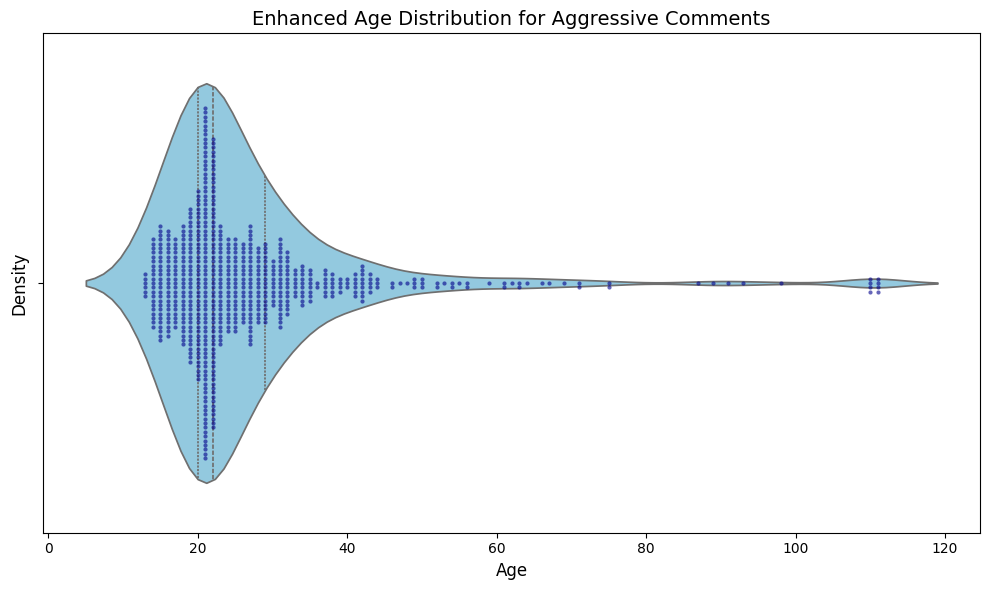

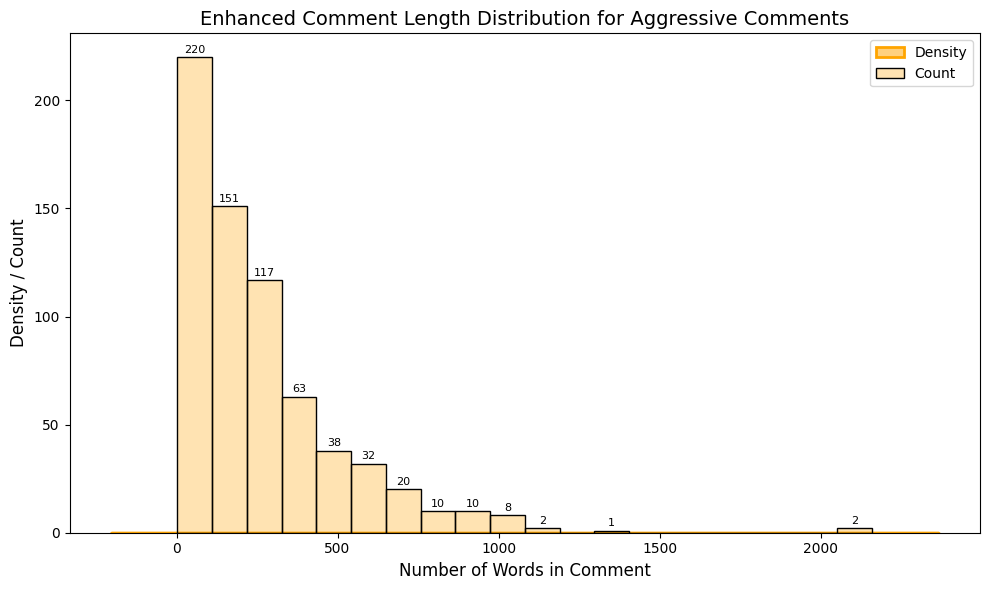

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file with sentiment analysis results
df = pd.read_csv("youtube_parsed_dataset_sentiment.csv")

# Filter for rows flagged as "Aggressive" and create a copy to avoid SettingWithCopyWarning
df_aggressive = df[df['sentiment_class'] == 'Aggressive'].copy()

# Create a new column for comment length (number of words)
df_aggressive['comment_length'] = df_aggressive['Text'].apply(lambda x: len(str(x).split()))

# ---------------- Enhanced Age Distribution ----------------
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_aggressive['Age'], color='skyblue', inner='quartile')
sns.swarmplot(x=df_aggressive['Age'], color='darkblue', size=3, alpha=0.6)
plt.title("Enhanced Age Distribution for Aggressive Comments", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()




# Plot the KDE + Histogram
plt.figure(figsize=(10, 6))

# Plot the KDE (Density)
ax = sns.kdeplot(
    data=df_aggressive,
    x='comment_length',
    fill=True,
    color='orange',
    alpha=0.5,
    linewidth=2,
    label="Density"
)

# Plot the Histogram
hist_plot = sns.histplot(
    data=df_aggressive,
    x='comment_length',
    bins=20,
    color='orange',
    edgecolor='black',
    alpha=0.3,
    label="Count"
)

# Annotate each histogram bar with its count
for patch in hist_plot.patches:
    height = patch.get_height()
    if height > 0:  # Only annotate bars that have a height > 0
        x_position = patch.get_x() + patch.get_width() / 2
        hist_plot.text(
            x_position,
            height + 1,             # Slight offset above the bar
            f'{int(height)}',       # Convert float to int for a clean label
            ha='center',
            va='bottom',
            fontsize=8
        )

plt.title("Enhanced Comment Length Distribution for Aggressive Comments", fontsize=14)
plt.xlabel("Number of Words in Comment", fontsize=12)
plt.ylabel("Density / Count", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

This code loads a CSV file containing cyber bullying data, filters out non-bullying entries, and preprocesses the text. It then creates a large, interactive donut chart using Plotly to show the distribution of bullying categories (with labels and percentages). When you click on a segment of the donut chart, a drill-down callback generates and displays a word cloud for that specific category, enabling you to explore the key terms used in each bullying category directly in a Jupyter Notebook.

In [1]:
# import pandas as pd
# import plotly.graph_objects as go
# import plotly.express as px
# import re, string

# # ------------------ Load and Preprocess Data ------------------
# df = pd.read_csv("cb_multi_labeled_balanced.csv")
# # Filter out rows labeled as 'not_cyberbullying'
# df = df[df['label'] != 'not_cyberbullying']

# def preprocess_text(text):
#     """Lowercase, remove punctuation, digits, and extra spaces."""
#     text = str(text).lower()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     text = re.sub(r'\d+', '', text)
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# df['cleaned_text'] = df['text'].apply(preprocess_text)

# # ------------------ Create Donut Chart ------------------
# label_counts = df['label'].value_counts()
# labels = label_counts.index.tolist()
# counts = label_counts.values.tolist()

# fig = go.Figure(data=[go.Pie(labels=labels, values=counts, hole=0.4,
#                               marker=dict(colors=px.colors.qualitative.Plotly))])
# fig.update_layout(title_text="Distribution of Cyber Bullying Categories",
#                   width=1000, height=800)

# # ------------------ Display the Visualization ------------------
# fig.show()



import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import re, string
from sqlalchemy import create_engine

# ------------------ Database Connection ------------------
username = 'admin'      # Replace with your RDS username
password = 'fit5120ta30'      # Replace with your RDS password
host = 'shieldspace.ck1sygqoe3hd.us-east-1.rds.amazonaws.com'
database = 'shieldspace'

# Create the connection string and engine for MySQL
engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}/{database}")

# ------------------ Load Data from Database ------------------
# This query retrieves all records from the table that holds your CSV data.
query = "SELECT * FROM cb_multi_labeled_balanced"
df = pd.read_sql(query, engine)

# Filter out rows labeled as 'not_cyberbullying'
df = df[df['label'] != 'not_cyberbullying']

# ------------------ Preprocess Data ------------------
def preprocess_text(text):
    """Lowercase, remove punctuation, digits, and extra spaces."""
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

# ------------------ Create Donut Chart ------------------
label_counts = df['label'].value_counts()
labels = label_counts.index.tolist()
counts = label_counts.values.tolist()

fig = go.Figure(data=[go.Pie(labels=labels, values=counts, hole=0.4,
                              marker=dict(colors=px.colors.qualitative.Plotly))])
fig.update_layout(title_text="Distribution of Cyber Bullying Categories",
                  width=1000, height=800)

# ------------------ Display the Visualization ------------------
fig.show()

ProgrammingError: (mysql.connector.errors.ProgrammingError) 1146 (42S02): Table 'shieldspace.cb_multi_labeled_balanced' doesn't exist
[SQL: SELECT * FROM cb_multi_labeled_balanced]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [2]:
##################################iteration 2 
import random
import textwrap
import nltk
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from transformers import pipeline

# ------------------- Download NLTK Data -------------------
nltk.download('punkt')
nltk.download('vader_lexicon')

# ------------------- Initialize Transformer Models -------------------
emotion_classifier = pipeline(
    "text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None,
    truncation=True
)

toxicity_classifier = pipeline(
    "text-classification",
    model="unitary/toxic-bert",
    top_k=None,
    truncation=True
)

# ------------------- Model Helper Functions -------------------
def get_transformer_emotions(text):
    """
    Uses the GoEmotions model to compute emotion scores.
    Returns the top 5 emotions (sorted by score) as a dictionary.
    """
    results = emotion_classifier(text)[0]
    sorted_results = sorted(results, key=lambda x: x['score'], reverse=True)[:5]
    return {item['label']: item['score'] for item in sorted_results}

def get_toxicity_score(text):
    """
    Uses the Toxic-BERT model to compute toxicity scores.
    Returns a dictionary mapping each toxicity label to its score.
    """
    results = toxicity_classifier(text)[0]
    return {item['label']: item['score'] for item in results}

def display_analysis(message):
    """
    Analyzes the text using the transformer models,
    prints the results, and returns an analysis dictionary.
    """
    emotions = get_transformer_emotions(message)
    trigger_emotion = max(emotions, key=emotions.get)
    toxicity = get_toxicity_score(message)
    toxic_level = toxicity.get('toxic', 0.0)

    analysis = {
        "toxic_level": toxic_level,
        "toxicity": toxicity,
        "emotions": emotions,
        "trigger_emotion": trigger_emotion
    }

    separator = "=" * 80
    print("\n" + separator)
    print("Message Analysis:")
    print(textwrap.fill(message, width=80))
    print("\nTop Emotions (score):")
    for label, score in analysis["emotions"].items():
        print(f"  {label}: {score:.3f}")
    print(f"\nPrimary Emotion: {trigger_emotion}")
    print("\nToxicity Scores:")
    for label, score in analysis["toxicity"].items():
        print(f"  {label}: {score:.3f}")
    print(separator + "\n")

    return analysis

# ------------------- ANSI Colors for Terminal Output -------------------
HEADER_COLOR = '\033[95m'
SUBHEADER_COLOR = '\033[94m'
OKGREEN = '\033[92m'
WARNING_COLOR = '\033[93m'
FAIL_COLOR = '\033[91m'
RESET_COLOR = '\033[0m'

def display_results(inferences, feedback, tips, total_points, badge):
    separator = "=" * 70
    print(HEADER_COLOR + separator + RESET_COLOR)
    print(HEADER_COLOR + "--- What Can You Infer? ---" + RESET_COLOR)
    print(HEADER_COLOR + separator + RESET_COLOR)

    for category, message in inferences.items():
        print(f"{SUBHEADER_COLOR}{category}:{RESET_COLOR} {message}")

    print("\n" + HEADER_COLOR + separator + RESET_COLOR)
    print(HEADER_COLOR + "--- Personalized Feedback ---" + RESET_COLOR)
    print(HEADER_COLOR + separator + RESET_COLOR)
    print(feedback)

    print("\n" + HEADER_COLOR + separator + RESET_COLOR)
    print(HEADER_COLOR + "--- Tips for a Happy, Healthy Day ---" + RESET_COLOR)
    print(HEADER_COLOR + separator + RESET_COLOR)
    for tip in tips:
        print(tip)

    print("\n" + HEADER_COLOR + separator + RESET_COLOR)
    print(f"{OKGREEN}Points Earned: {total_points}   Badge Achieved: '{badge}'{RESET_COLOR}")
    print(HEADER_COLOR + separator + RESET_COLOR)

# ------------------- Likert-Scale Quiz Functions -------------------
def run_quiz(user_name):
    total_points = 0  # For gamification

    # Print a friendly welcome message using the already provided name
    print(f"\nHi {user_name}, welcome to the quiz!\n")

    # # Proceed with the quiz (no need to ask for the name again)
    # print("Welcome to the Cyber Safety Quiz!")
    print(f"\nHi {user_name}, please answer the following questions by typing the option number.\n")

    # Pre-coded messages for each question (child friendly)
    emotion_messages = {
        "1": [
            "Wow, you felt happy—like a bright sunny day when you play outside! Your smile makes the world a better place.",
            "You felt happy, and that happy feeling is like a warm hug from your best friend.",
            "I see you felt really happy—imagine your heart as a glittering star in the night sky!",
            "Feeling happy is awesome! It's like riding your favorite roller coaster with a huge smile.",
            "Your happy mood is like a rainbow after the rain—full of colors and wonder."
        ],
        "2": [
            "Feeling confused is okay—it’s like trying to solve a fun puzzle where things aren’t clear yet.",
            "You are a bit puzzled, which means you're curious and ready to learn more.",
            "It looks like you're feeling confused; even grown-ups sometimes wonder when things don’t add up.",
            "Being confused is like being on a mini adventure—sometimes you have to ask questions.",
            "I see you’re a bit puzzled; it can be exciting to explore and find out new things."
        ],
        "3": [
            "You felt sad, and that’s okay. Sometimes, feeling sad is like a little rain that helps you later see a beautiful rainbow.",
            "I see you felt sad—remember, after rainy days come sunny ones.",
            "Feeling sad shows you care. It’s okay to feel this way and to talk with someone who loves you.",
            "Your sadness is like quiet music—it may feel low now, but it can help you appreciate happy times later.",
            "It’s alright to feel sad; it can be like a gentle evening preparing you for a bright new day."
        ],
        "4": [
            "You felt angry, and that tells us you care about fairness. It’s okay to be upset—try taking deep breaths like blowing out birthday candles.",
            "I see you felt angry. It’s a powerful feeling that can help you stand up for what’s right, as long as you find a calm way to express it.",
            "Feeling angry is natural. It's like the fire in a campfire that keeps you warm—just remember to share your feelings with someone you trust.",
            "Your anger is strong and shows you want things to be fair. Sometimes, a pause and a deep breath can help cool that fire.",
            "When you feel angry, it means something is bothering you. Talking to someone who cares can help turn that storm into a gentle breeze."
        ],
        "5": [
            "You felt scared, and that’s important to notice—it's like a little alarm telling you to ask for help.",
            "I see that you felt scared—sometimes scary things happen, and it’s always okay to ask for a hug or help.",
            "Feeling scared signals that you might need someone by your side—like holding a parent’s hand when it's dark.",
            "Your fear is important. It means you care about your safety; speaking with someone you trust can help you feel brave again.",
            "When you feel scared, think of it as a chance to share your worries with someone who can help chase away the shadows."
        ]
    }

    perception_messages = {
        "1": [
            "You didn’t think the message was meant to hurt—which is like choosing to see the fun side of a silly joke!",
            "I see you felt it was just a joke. Sometimes, laughing it off is the best way to keep your day light.",
            "Your view is bright—you see the message as harmless fun, which shows you have a kind heart.",
            "Not thinking it's hurtful is like spotting a small cloud and knowing the sun is still shining.",
            "Your perspective shows you focus on the good things—even when others might not be kind."
        ],
        "2": [
            "It seems you're a bit unsure about the message—when things aren’t clear, it’s great to ask a grown-up for help.",
            "Being unsure is natural. Sometimes a chat with someone who understands makes things clearer.",
            "Your uncertainty means you're very thoughtful. Asking questions is a superpower!",
            "Not being 100% sure shows you’re curious—talking with an adult can help untangle the mystery.",
            "If you're not sure, that's okay—it's always good to ask for guidance when things seem mixed up."
        ],
        "3": [
            "You noticed that the message was mean, which shows you know when words can hurt. Trust your heart—it knows what's right!",
            "I see you think the message was hurtful. That means you care about kindness and fairness.",
            "Recognizing meanness is important. Your sense of fairness helps keep you safe.",
            "Your eyes caught the unkind part of the message—it shows you care about how people treat each other.",
            "Seeing the hurtful side means you're aware of feelings—and that awareness helps you make good choices."
        ]
    }

    empathy_coping_messages = {
        "1": [
            "Sometimes ignoring a mean message is the best way to keep your smile shining—like skipping over a puddle to stay dry.",
            "Choosing to ignore it is like deciding not to let a little drizzle stop you from playing outside.",
            "Ignoring unkind words is like turning away from a cloud so the sunshine can shine in.",
            "Not giving attention to a mean message shows you’re focusing on happy things—like playing in a sunny park.",
            "When you ignore a hurtful message, you're choosing to stay positive and keep your day bright."
        ],
        "2": [
            "Telling a trusted adult is a super-smart move—like calling your favorite superhero when you need help.",
            "Sharing with a parent or teacher is wonderful; they can help fix problems like solving a tricky puzzle.",
            "Talking to someone who cares is like having a buddy always ready to help you out.",
            "Speaking with a grown-up is a brave step—imagine them as your wise mentor guiding you through challenges.",
            "By telling an adult, you're unlocking a treasure chest of help and kindness."
        ],
        "3": [
            "Replying angrily might feel natural, but sometimes it makes the storm inside windier. A calm word can clear the sky.",
            "When anger urges you to shout back, take a deep breath—sometimes a gentle reply is like a soft breeze after a storm.",
            "Angry words can add to the chaos—imagine them like thunder, while a calm tone can bring back the sunshine.",
            "Even if you feel like replying in anger, try a gentle response to help bring back peace.",
            "Sometimes, a quiet answer is like a gentle breeze that calms a stormy day."
        ],
        "4": [
            "It's okay to cry—it shows your heart is full of feelings. After a cry, talking to someone can help lift those clouds.",
            "Crying is a natural way to let out emotions. Sharing your tears afterward can make you feel comforted.",
            "When you cry, it’s like releasing a little rain that makes space for the sun to shine again.",
            "Your tears show you care deeply. Talking about them can help turn a gray day into a bright one.",
            "It's perfectly okay to cry—imagine your tears watering a garden that will soon bloom with sunshine."
        ]
    }

    exposure_messages = {
        "1": [
            "It looks like you haven’t seen many mean messages—your online space is as friendly as a fun playground!",
            "Good news! Your digital space seems safe and full of kind, happy messages.",
            "Not many hurtful messages have reached you—like playing in a garden full of sunshine and smiles.",
            "It sounds like your online world is mostly friendly and caring, just like a room full of smiling friends.",
            "Your digital space is filled with kindness, like a bright, welcoming neighborhood."
        ],
        "2": [
            "Seeing a few unkind messages now and then is normal—like a few raindrops during a sunny day.",
            "Sometimes, a couple of mean messages might pop up, but each one teaches you how to protect your feelings.",
            "Even if you see a few unkind words, it helps you learn to stand strong, just like a little superhero.",
            "A few hurtful messages are like small bumps on the road that help you learn to ride your bike better.",
            "Even a couple of mean messages are chances to learn how to keep your smile shining."
        ],
        "3": [
            "Seeing lots of mean messages can feel heavy, like a long rainy day. It might help to share your feelings with someone who cares.",
            "When unkind messages come a lot, it might feel like a storm. Talking to someone can be like finding shelter under a friendly tree.",
            "If you often see hurtful words, it might feel like a heavy rain. Sharing how you feel can bring back the sunshine.",
            "Experiencing many unkind messages might feel like a long, dark tunnel—remember, you can ask someone to help light your way.",
            "When mean messages pile up, it's important to talk to someone who understands, so you don't have to face the storm alone."
        ]
    }

    reaction_messages = {
        "1": [
            "Blocking someone is like closing a door on a chilly wind—it keeps your space safe and cozy.",
            "Using the block button is like wearing a superhero cape; it protects you from negativity.",
            "Blocking unkind messages is smart—like building a fence around your favorite fort to keep it safe.",
            "When you block someone, it shows you care about your space and want only kind words inside.",
            "Your decision to block means you're guarding your happiness, like a captain steering a ship away from stormy seas."
        ],
        "2": [
            "Telling your parents or teachers is like calling your favorite helper—they're always there to make you feel safe and loved.",
            "Sharing your feelings with a grown-up is brave—like inviting a wise friend to help solve a tricky puzzle.",
            "Talking to someone you trust is a super move—it’s like having a friendly guide who helps you through challenges.",
            "When you speak up to an adult, it's like pressing a magic button that brings comfort and support.",
            "By telling a trusted adult, you open a door to help and care—it's like receiving a big, warm hug."
        ],
        "3": [
            "Sometimes replying with a little humor can turn a frown into a smile—like finding a funny cartoon that makes you laugh.",
            "Using humor to respond is like discovering a shiny gem that brightens a cloudy moment.",
            "A funny reply might ease a tough situation, just as a silly joke can break the ice on a cold day.",
            "When you choose humor, it shows you can find a bright spot even in tricky times—like a sparkle that lights up the dark.",
            "A cheerful comeback is like a burst of laughter that sends bad vibes packing."
        ],
        "4": [
            "Hiding your feelings might seem easier sometimes, but sharing them is like opening a window to let in fresh, happy air.",
            "While keeping quiet may seem safe, talking to someone you trust can help lift a heavy feeling.",
            "Even if keeping quiet feels comfortable, sharing your heart can turn a gloomy day into a bright one.",
            "When you share how you feel, it’s like spreading sunshine all around—lifting your spirit and the spirits of others.",
            "Though you might want to keep it all to yourself, remember that talking with someone who cares can really help you feel better."
        ]
    }

    # --- Collect Quiz Responses ---


    # Q1: Emotional Response
    print("1. How did this message make you feel?")
    print("   1) 😃 Happy")
    print("   2) 😐 Confused")
    print("   3) 😟 Sad")
    print("   4) 😡 Angry")
    print("   5) 😨 Scared")
    q1 = input("Enter the number for your answer: ").strip()
    total_points += int(get_point_value("q1", q1))

    # Adaptive branching: if Confused (2) or Scared (5), ask an extra safety question.
    safe_response = ""
    if q1 in ["2", "5"]:
        safe_response = ask_safety_question(name)
        total_points += int(get_point_value("safety", safe_response))

    # Q2: Perception of Intent
    print("\n2. Do you think this message was meant to be hurtful?")
    print("   1) 👍 No, it was just a joke")
    print("   2) 🤔 Maybe, not sure")
    print("   3) 👎 Yes, it was mean")
    q2 = input("Enter the number for your answer: ").strip()
    total_points += int(get_point_value("q2", q2))

    # Q3: Advice for a Friend
    print("\n3. If someone sent this to your friend, how should they react?")
    print("   1) 🚫 Ignore it")
    print("   2) 🧑‍🏫 Tell a trusted adult or teacher")
    print("   3) ✍️ Reply back angrily")
    print("   4) 😢 Cry or feel bad")
    q3 = input("Enter the number for your answer: ").strip()
    total_points += int(get_point_value("q3", q3))

    # Q4: Exposure
    print("\n4. Have you seen or received a message like this before?")
    print("   1) 🙅 Never")
    print("   2) 🔁 A few times")
    print("   3) 😞 Many times")
    q4 = input("Enter the number for your answer: ").strip()
    total_points += int(get_point_value("q4", q4))

    # Q5: Personal Reaction
    print("\n5. What would you do if someone keeps sending mean messages to you?")
    print("   1) 📱 Block them")
    print("   2) 👨‍👩‍👧‍👦 Tell my parents or teachers")
    print("   3) 🙃 Say something funny back")
    print("   4) 🤐 Keep it to myself")
    q5 = input("Enter the number for your answer: ").strip()
    total_points += int(get_point_value("q5", q5))

    responses = {"q1": q1, "q2": q2, "q3": q3, "q4": q4, "q5": q5}

    # --- Assemble Inferences ---
    inferences = {}
    inferences["Emotional State"] = random.choice(emotion_messages.get(q1, ["Your feelings are noted."]))
    inferences["Perception"] = random.choice(perception_messages.get(q2, ["Your perception is noted."]))
    inferences["Empathy & Coping"] = random.choice(empathy_coping_messages.get(q3, ["Your way of handling things is unique and important."]))
    inferences["Exposure"] = random.choice(exposure_messages.get(q4, ["Your exposure level is noted."]))
    inferences["Personal Reaction"] = random.choice(reaction_messages.get(q5, ["Your personal reaction is noted."]))

    # --- Build Personalized Feedback ---
    feedback_parts = []
    if q1 == "3" or q4 == "3":
        feedback_parts.append(f"{user_name}, it seems like sometimes you feel a bit down or overwhelmed when hurtful messages appear.")
    elif q1 == "5":
        feedback_parts.append(f"{user_name}, I see that at times you feel scared. It's very important for you to feel safe and cared for.")
    else:
        feedback_parts.append(f"{user_name}, you seem to handle your online experiences well and have a positive outlook.")

    if q2 == "2":
        feedback_parts.append("When you're unsure if a message is mean or just silly, it's always a good idea to ask a grown-up for guidance.")
    elif q2 == "3":
        feedback_parts.append("Noticing that a message could hurt shows how much you care about kindness. Trust your feelings!")
    else:
        feedback_parts.append("It's great that you can see the fun side of things—it keeps your day bright!")

    if q3 == "1":
        feedback_parts.append("Ignoring a mean message sometimes protects your mood—like skipping over a puddle to keep your shoes dry.")
    elif q3 == "2":
        feedback_parts.append("Talking to a trusted adult is like having a superhero by your side—it makes you stronger!")
    elif q3 == "3":
        feedback_parts.append("Even if anger tempts you to shout back, a calm reply can help clear the storm and bring back the sunshine.")
    elif q3 == "4":
        feedback_parts.append("Crying shows you have a caring heart. Sharing your feelings can help clear away the clouds.")

    if q4 == "3":
        feedback_parts.append("Seeing lots of hurtful messages can feel heavy—sharing your feelings can let the sunshine in.")
    elif q4 == "2":
        feedback_parts.append("Even a few mean messages help you learn how to protect your smile and grow stronger.")
    else:
        feedback_parts.append("It looks like your online world is mostly kind—a wonderful space to be in!")

    if q5 == "4":
        feedback_parts.append("Although keeping your feelings inside might seem easier sometimes, sharing them can really help you feel lighter.")
    elif q5 == "1":
        feedback_parts.append("Blocking mean messages is a smart way to protect your space—like closing a door to keep the cold wind out.")
    elif q5 == "2":
        feedback_parts.append("Telling your parents or teachers is a brave move—it invites caring support when you need it.")
    elif q5 == "3":
        feedback_parts.append("Using humor to respond can sometimes turn a frown upside down and brighten the moment.")

    random.shuffle(feedback_parts)
    final_feedback = " ".join(feedback_parts)
    badge, level_message = get_badge(total_points)
    final_feedback += f" Also, you earned {total_points} points and achieved the badge: '{badge}'! {level_message}"

    tips = get_tips()
    display_results(inferences, final_feedback, tips, total_points, badge)
    create_risk_radar(responses, total_points)

def ask_safety_question(name):
    print("\nIt looks like you sometimes feel confused or scared. Can you tell me what makes you feel safe online?")
    print("   1) Talking to a trusted adult")
    print("   2) Playing my favorite game")
    print("   3) Listening to music")
    print("   4) Reading a favorite book")
    print("   5) Spending time with friends")
    safe_q = input("Enter the number for your answer: ").strip()
    return safe_q

def get_point_value(question, answer):
    points = {
        "q1": {"1": 1, "2": 2, "3": 3, "4": 2, "5": 3},
        "q2": {"1": 1, "2": 2, "3": 3},
        "q3": {"1": 1, "2": 1, "3": 3, "4": 3},
        "q4": {"1": 1, "2": 2, "3": 3},
        "q5": {"1": 1, "2": 1, "3": 2, "4": 3},
        "safety": {"1": 1, "2": 1, "3": 1, "4": 1, "5": 1}
    }
    return points.get(question, {}).get(answer, 0)

def get_badge(total_points):
    if total_points >= 14:
        return ("Kind Champion", "You're a true champion of kindness and bravery!")
    elif total_points >= 10:
        return ("Brave Explorer", "You explore your feelings with courage and care!")
    else:
        return ("Caring Star", "You shine bright with care and positivity!")

def get_tips():
    tips = [
        "Tip: If you ever feel upset or confused, try taking three deep, slow breaths—it can help you calm down.",
        "Tip: Remember, it's always a good idea to talk to someone you trust when something feels wrong.",
        "Tip: If you see unkind messages, don't let them ruin your day. Focus on the things that make you happy!",
        "Tip: Keep a fun journal where you draw or write about your favorite moments—it can brighten even a cloudy day.",
        "Tip: Be kind to yourself. Everyone has tough days, but you have the strength to overcome them!",
        "Tip: Sharing your feelings is brave. It helps you feel understood and supported.",
        "Tip: Sometimes, a little humor can turn a bad day around. Don't be afraid to laugh!",
        "Tip: Always remember that your feelings matter, and it's okay to ask for help when you need it."
    ]
    return random.sample(tips, 3)

def create_risk_radar(responses, total_points):
    score = 0
    if responses["q1"] == "3":
        score += 3
    elif responses["q1"] == "4":
        score += 2
    elif responses["q1"] == "5":
        score += 3
    else:
        score += 1
    if responses["q2"] == "2":
        score += 2
    elif responses["q2"] == "3":
        score += 3
    else:
        score += 1
    if responses["q3"] in ["3", "4"]:
        score += 3
    elif responses["q3"] == "2":
        score += 1
    else:
        score += 1
    if responses["q4"] == "1":
        score += 1
    elif responses["q4"] == "2":
        score += 2
    elif responses["q4"] == "3":
        score += 3
    else:
        score += 1
    if responses["q5"] == "4":
        score += 3
    elif responses["q5"] == "1":
        score += 1
    elif responses["q5"] == "2":
        score += 1
    elif responses["q5"] == "3":
        score += 2
    else:
        score += 1
    if score >= 12:
        zone = "Needs help"
        indicator_position = 0.10
    elif score >= 9:
        zone = "Worried"
        indicator_position = 0.35
    else:
        zone = "Doing okay"
        indicator_position = 0.65
    if zone == "Doing okay":
        character_emoji = "😃"
    elif zone == "Worried":
        character_emoji = "😟"
    else:
        character_emoji = "😢"

    fig, ax = plt.subplots(figsize=(8, 3))
    ax.axis('off')
    plt.text(0.02, 0.9, "Emotional Wellness Radar", fontsize=12, fontweight='bold')
    ax.add_patch(Rectangle((0.02, 0.4), 0.20, 0.3, color='red'))
    ax.add_patch(Rectangle((0.22, 0.4), 0.20, 0.3, color='orange'))
    ax.add_patch(Rectangle((0.42, 0.4), 0.20, 0.3, color='yellow'))
    ax.add_patch(Rectangle((0.62, 0.4), 0.20, 0.3, color='green'))
    plt.text(0.02, 0.25, "Needs help", fontsize=10)
    plt.text(0.25, 0.25, "Worried", fontsize=10)
    plt.text(0.45, 0.25, "Doing okay", fontsize=10)
    plt.text(0.65, 0.25, "Happy zone", fontsize=10)
    plt.plot(indicator_position, 0.55, 'v', color='black', markersize=12)
    plt.text(indicator_position, 0.15, f"You're in: {zone}", ha='center', fontsize=10)
    plt.text(0.05, 0.05, f"Total Points: {total_points}", fontsize=10)
    plt.text(0.75, 0.05, f"Your Mood: {character_emoji}", fontsize=20)
    plt.title("Risk Radar / Emotional Flag", fontsize=12, pad=10)
    plt.subplots_adjust(top=0.85, bottom=0.15)
    plt.show()

def main():
    print("Enter a message to analyze its emotions and toxicity:")
    message = input("Message: ").strip()
    analysis = display_analysis(message)

    play_quiz = input("Would you like to play a quick quiz for this message? (yes/no): ").strip().lower()
    if play_quiz.startswith('y'):
        name = input("Please enter your name: ").strip()
        run_quiz(name)
    else:
        print("Alright! Thank you for analyzing the message.")

if __name__ == "__main__":
    main()



FileNotFoundError: [Errno 2] No such file or directory: 'cb_multi_labeled_balanced.csv'

code to store table in db

In [8]:
# ─── Packages ─────────────────────────────────────────────────────────────
import pandas as pd
from sqlalchemy import create_engine, text
import sqlalchemy.types as satypes

# ─── 1.  CONNECTION INFO  ─────────────────────────────────────────────────
username = "admin"                 # ← your RDS user
password = "fit5120ta30"           # ← your RDS password
host     = "shieldspace.ck1sygqoe3hd.us-east-1.rds.amazonaws.com"
database = "shieldspace"

engine = create_engine(
    f"mysql+mysqlconnector://{username}:{password}@{host}/{database}",
    pool_pre_ping=True,            # quick dead-connection check
)

# ─── 2.  TEST THE CONNECTION  ─────────────────────────────────────────────
try:
    with engine.connect() as conn:
        conn.execute(text("SELECT 1"))
    print("✅  Successfully connected to the database.")
except Exception as e:
    raise RuntimeError(f"❌  Database connection failed: {e}")

# ─── 3.  BUILD THE SUMMARY DATAFRAME  ─────────────────────────────────────
df = (
    pd.read_csv("final_hateXplain.csv")
      .query("label != 'normal'")                           # keep hate/offensive
)
df = df[~df["Race"].str.lower().str.replace(" ", "_").eq("no_race")]

summary = (
    df["Race"]
      .value_counts()
      .rename_axis("race")
      .reset_index(name="count")
      .assign(percentage=lambda d: d["count"] / d["count"].sum())
)

total_row = pd.DataFrame({
    "race": ["Total"],
    "count": [summary["count"].sum()],
    "percentage": [1.0]
})
summary = pd.concat([summary, total_row], ignore_index=True)

# ─── 4.  PUSH TO MYSQL  ───────────────────────────────────────────────────
table_name = "race_summary"        # change if you like

dtype_map = {
    "race": satypes.VARCHAR(32),
    "count": satypes.INTEGER(),
    "percentage": satypes.FLOAT(asdecimal=False),
}

summary.to_sql(
    name       = table_name,
    con        = engine,
    if_exists  = "replace",        # "append" if you want to keep old rows
    index      = False,
    dtype      = dtype_map,
)

print(f"✅  Table `{table_name}` written to `{database}` database.")

# ─── 5.  OPTIONAL: QUERY BACK TO VERIFY  ──────────────────────────────────
with engine.connect() as conn:
    check_df = pd.read_sql(f"SELECT * FROM {table_name}", conn)
print("\nPreview from DB:")
print(check_df)

✅  Successfully connected to the database.
✅  Table `race_summary` written to `shieldspace` database.

Preview from DB:
         race  count  percentage
0     African   3439    0.592318
1        Arab   1090    0.187737
2   Caucasian    603    0.103858
3       Asian    308    0.053049
4    Hispanic    296    0.050982
5  Indigenous     38    0.006545
6      Indian     32    0.005512
7       Total   5806    1.000000


In [11]:
# ── 0. Imports & DB connection ────────────────────────────────────────────
import pandas as pd
from sqlalchemy import create_engine, text
import sqlalchemy.types as satypes

# RDS credentials
username = "admin"
password = "fit5120ta30"
host     = "shieldspace.ck1sygqoe3hd.us-east-1.rds.amazonaws.com"
database = "shieldspace"

engine = create_engine(
    f"mysql+mysqlconnector://{username}:{password}@{host}/{database}",
    pool_pre_ping=True,                # auto-reconnect if idle
)

# quick connection test
with engine.connect() as conn:
    conn.execute(text("SELECT 1"))
print("✅  Connected to RDS")

# ── 1. Load CSV & filter ─────────────────────────────────────────────────
df = pd.read_csv("final_hateXplain.csv")

# keep only offensive / hatespeech
df = df.loc[df["label"].ne("normal")].copy()

# drop “non-religious” placeholders
drop_tokens = {"no_religion", "non_religious", "nonreligious", "none"}
df = df[~df["Religion"].str.lower().str.replace(" ", "_").isin(drop_tokens)]

# ── 2. Build summary by Religion *and* label ─────────────────────────────
summary_lbl = (
    df.groupby(["Religion", "label"], as_index=False)
      .size()
      .rename(columns={"size": "count"})
)

# percentage within each religion
summary_lbl["pct_within_religion"] = (
    summary_lbl["count"] /
    summary_lbl.groupby("Religion")["count"].transform("sum")
)

# ── 3. Write to MySQL ────────────────────────────────────────────────────
dtype_map = {
    "Religion"           : satypes.VARCHAR(48),
    "label"              : satypes.VARCHAR(12),
    "count"              : satypes.INTEGER(),
    "pct_within_religion": satypes.FLOAT(asdecimal=False),
}

summary_lbl.to_sql(
    name      = "religion_summary_by_label",
    con       = engine,
    if_exists = "replace",      # change to "append" if you prefer
    index     = False,
    dtype     = dtype_map,
)

print("✅  Table `religion_summary_by_label` written to MySQL")

# ── 4. Verify (read back a preview) ──────────────────────────────────────
with engine.connect() as conn:
    preview = pd.read_sql(
        "SELECT * FROM religion_summary_by_label ORDER BY Religion, label LIMIT 12",
        conn
    )

print("\nPreview:")
print(preview.to_string(index=False, formatters={
    "count": "{:,}".format,
    "pct_within_religion": "{:.4f}".format,
}))

✅  Connected to RDS
✅  Table `religion_summary_by_label` written to MySQL

Preview:
 Religion      label count pct_within_religion
 Buddhism hatespeech     3              0.3750
 Buddhism  offensive     5              0.6250
Christian hatespeech    59              0.5268
Christian  offensive    53              0.4732
    Hindu hatespeech    18              0.5806
    Hindu  offensive    13              0.4194
    Islam hatespeech 1,497              0.6630
    Islam  offensive   761              0.3370
   Jewish hatespeech 1,406              0.7679
   Jewish  offensive   425              0.2321


In [24]:
############################################################################
# 0.  IMPORTS & DB CONNECTION
############################################################################
import pandas as pd
from sqlalchemy import create_engine, text
import sqlalchemy.types as satypes

username = "admin"
password = "fit5120ta30"
host     = "shieldspace.ck1sygqoe3hd.us-east-1.rds.amazonaws.com"
database = "shieldspace"

engine = create_engine(
    f"mysql+mysqlconnector://{username}:{password}@{host}/{database}",
    pool_pre_ping=True,
)

# quick connection test
with engine.connect() as conn:
    conn.execute(text("SELECT 1"))
print("✅  Connected to RDS")

############################################################################
# 1.  LOAD & FILTER DATA  (bullying only, drop placeholders)
############################################################################
df = pd.read_csv("final_hateXplain.csv")
df = df[df["label"].isin(["offensive", "hatespeech"])].copy()     # bullying rows

misc_drop = {"none", "na", "n_a", "no_misc", "nomisc", "other", ""}
so_drop   = {"none", "na", "n_a", "unknown", "no_orientation", "other", ""}

df = df[~df["Miscellaneous"].str.lower().str.replace(" ", "_").isin(misc_drop)]
df = df[~df["Sexual Orientation"].str.lower().str.replace(" ", "_").isin(so_drop)]

############################################################################
# 2-A.  BUILD  Miscellaneous × label  SUMMARY
############################################################################
misc_summary = (
    df.groupby(["Miscellaneous", "label"], as_index=False)
      .size()
      .rename(columns={
          "Miscellaneous": "category",
          "size"         : "count"
      })
)

############################################################################
# 2-B.  BUILD  Sexual-orientation bullying totals
############################################################################
so_summary = (
    df["Sexual Orientation"]
      .value_counts()
      .rename_axis("orientation")
      .reset_index(name="count")
)

############################################################################
# 3.  WRITE BOTH TABLES TO MYSQL
############################################################################
# dtype mappings
misc_dtypes = {
    "category": satypes.VARCHAR(64),
    "label"   : satypes.VARCHAR(12),
    "count"   : satypes.INTEGER()
}

so_dtypes = {
    "orientation": satypes.VARCHAR(32),
    "count"      : satypes.INTEGER()
}

misc_summary.to_sql(
    name      ="misc_by_label",
    con       =engine,
    if_exists ="replace",          # "append" if you prefer
    index     =False,
    dtype     =misc_dtypes,
)
so_summary.to_sql(
    name      ="so_bullying_totals",
    con       =engine,
    if_exists ="replace",
    index     =False,
    dtype     =so_dtypes,
)

print("✅  Tables `misc_by_label` and `so_bullying_totals` written to MySQL")

############################################################################
# 4.  VERIFY  (read back a few rows)
############################################################################
with engine.connect() as conn:
    print("\nPreview misc_by_label:")
    print(pd.read_sql("SELECT * FROM misc_by_label LIMIT 8", conn).to_string(index=False))

    print("\nPreview so_bullying_totals:")
    print(pd.read_sql("SELECT * FROM so_bullying_totals", conn).to_string(index=False))

✅  Connected to RDS
✅  Tables `misc_by_label` and `so_bullying_totals` written to MySQL

Preview misc_by_label:
  category      label  count
Disability hatespeech     11
Disability  offensive      7
  Minority hatespeech     30
  Minority  offensive     13
   Refugee hatespeech     26
   Refugee  offensive      8

Preview so_bullying_totals:
 orientation  count
  Homosexual   1627
Heterosexual     95
    Bisexual      2


tree map code-

In [ ]:
"""
PRETTIFIED TREEMAP  –  Race distribution (No_race removed)
----------------------------------------------------------
Save as race_treemap.py or paste into a notebook cell.

Dependencies: squarify, seaborn, matplotlib, pandas
If squarify or seaborn are missing, they’re auto-installed.
"""

# ── Imports (auto-install squarify & seaborn if needed) ───────────────────
import sys, subprocess, importlib

def ensure(pkg):
    try:
        return importlib.import_module(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
        return importlib.import_module(pkg)

squarify = ensure("squarify")
sns       = ensure("seaborn")

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")                       # or any mpl style you love

# ── Load CSV & filter ─────────────────────────────────────────────────────
df = (
    pd.read_csv("final_hateXplain.csv")
      .query("label != 'normal'")                             # keep target rows
)
df = df[~df["Race"].str.lower().str.replace(" ", "_").eq("no_race")]

# ── Prepare data for treemap ──────────────────────────────────────────────
counts   = df["Race"].value_counts()
sizes    = counts.values
labels   = [
    f"{race}\n{n:,}  ({n/sizes.sum():.1%})"
    for race, n in zip(counts.index, sizes)
]

# choose a nice qualitative palette the same length as categories
colors = sns.color_palette("Set3", n_colors=len(counts))

# ── Plot ──────────────────────────────────────────────────────────────────
plt.figure(figsize=(10, 6))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    pad=True,                       # inner padding for readability
    bar_kwargs=dict(edgecolor="white", linewidth=2)  # white borders
)

plt.axis("off")
plt.title("Race Distribution (hatespeech + offensive, ‘No_race’ removed)",
          fontsize=16, weight="bold", pad=12)
plt.tight_layout()
plt.show()

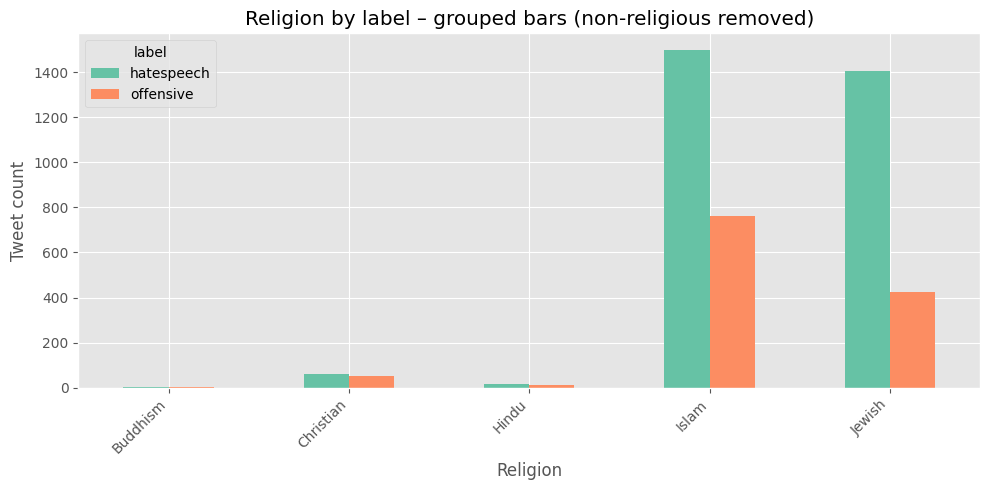

/var/folders/7g/xvgwvff15fd9mwhsywpbng3c0000gn/T/ipykernel_9095/3193372412.py:86: AltairDeprecationWarning:


Deprecated since `altair=5.0.0`. Use selection_point instead.



TypeError: altair.vegalite.v5.schema.core.SelectionParameter() got multiple values for keyword argument 'value'

In [10]:
#######################################################################
# 0.  Imports (auto-install Plotly & Altair if needed)
#######################################################################
import sys, subprocess, importlib

def ensure(pkg):
    try:
        return importlib.import_module(pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
        return importlib.import_module(pkg)

px  = ensure("plotly.express")
go  = ensure("plotly.graph_objects")
alt = ensure("altair")
sns = ensure("seaborn")
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

#######################################################################
# 1.  Load CSV  → keep only offensive / hatespeech
#######################################################################
df = pd.read_csv("final_hateXplain.csv")
df = df.query("label != 'normal'").copy()

# ── 1-a.  DROP “non-religious” rows ───────────────────────────────────
drop_list = {"no_religion", "non_religious", "nonreligious", "none"}
df = df[~df["Religion"].str.lower()
                   .str.replace(" ", "_")
                   .isin(drop_list)]

#######################################################################
# 2.  SUNBURST  (label → religion)
#######################################################################
sunburst_df = (
    df.groupby(["label", "Religion"], as_index=False)
      .size()
      .rename(columns={"size": "count"})
)

fig_sb = px.sunburst(
    sunburst_df,
    path=["label", "Religion"],
    values="count",
    color="label",
    color_discrete_map={"offensive": "#FF6361", "hatespeech": "#003F5C"},
    hover_data={"count": ":,"},
)
fig_sb.update_traces(insidetextorientation="radial")
fig_sb.update_layout(
    title="Sunburst – Label → Religion (non-religious removed)",
    margin=dict(t=40, l=0, r=0, b=0)
)
fig_sb.show()

#######################################################################
# 3.  GROUPED BAR (static)
#######################################################################
bar_df = sunburst_df.pivot(index="Religion", columns="label", values="count").fillna(0)

bar_df.plot(kind="bar", figsize=(10, 5), color=sns.color_palette("Set2", n_colors=2))
plt.ylabel("Tweet count")
plt.title("Religion by label – grouped bars (non-religious removed)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#######################################################################
# 4.  ALTAIR DROPDOWN  (count ↔ percentage)
#######################################################################
alt.data_transformers.disable_max_rows()

abs_df = bar_df.reset_index().melt(id_vars="Religion", var_name="label", value_name="value")
pct_df = (
    abs_df.assign(
        value=lambda d: d.groupby("Religion")["value"].transform(lambda x: x / x.sum())
    )
)

abs_df["view"] = "count"
pct_df["view"] = "percentage"
viz_df = pd.concat([abs_df, pct_df], ignore_index=True)

dropdown  = alt.binding_select(options=["count", "percentage"], name="Show: ")
selection = alt.selection_single(fields=["view"], bind=dropdown, init={"view": "count"})

chart = (
    alt.Chart(viz_df)
       .add_selection(selection)
       .transform_filter(selection)
       .mark_bar()
       .encode(
           x=alt.X("Religion:N", sort="-y"),
           y=alt.Y("value:Q", title="Tweets"),
           color=alt.Color("label:N", scale=alt.Scale(scheme="set2")),
           tooltip=[
               alt.Tooltip("Religion:N"),
               alt.Tooltip("label:N", title="Label"),
               alt.Tooltip("value:Q", title="Tweets", format=",.0f")
           ],
       )
       .properties(width=600, height=400,
                   title="Religion – interactive view (non-religious removed)")
)

chart
# chart.save("religion_dropdown.html")

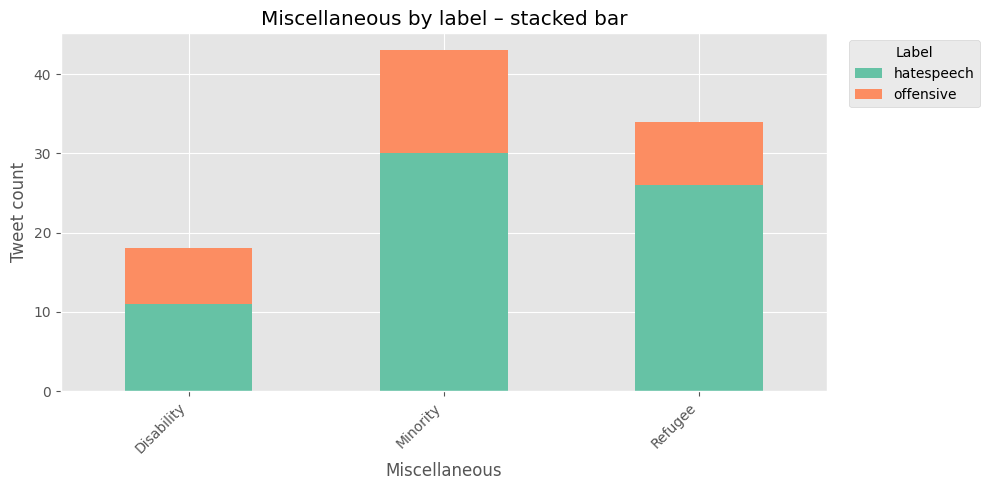

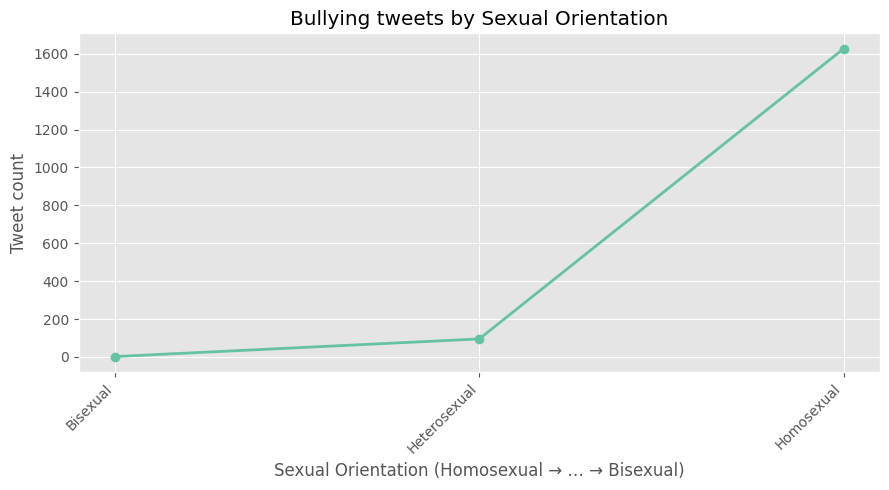

In [23]:
############################################################################
# 0. Imports & style
############################################################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
sns.set_palette("Set2")

############################################################################
# 1. Load CSV  → keep only bullying rows (offensive + hatespeech)
############################################################################
df = pd.read_csv("final_hateXplain.csv")
df = df[df["label"].isin(["offensive", "hatespeech"])].copy()   # bullying only

############################################################################
# 2. Drop placeholder tokens / “other”
############################################################################
misc_drop = {"none", "na", "n_a", "no_misc", "nomisc", "other", ""}
so_drop   = {"none", "na", "n_a", "unknown", "no_orientation", "other", ""}

df = df[~df["Miscellaneous"].str.lower().str.replace(" ", "_").isin(misc_drop)]
df = df[~df["Sexual Orientation"].str.lower().str.replace(" ", "_").isin(so_drop)]

############################################################################
# 3.  MISCELLANEOUS  –  stacked bar by label
############################################################################
misc_stack = pd.crosstab(df["Miscellaneous"], df["label"]).sort_index()

misc_stack.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.ylabel("Tweet count")
plt.title("Miscellaneous by label – stacked bar")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Label", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

############################################################################
# 4.  SEXUAL ORIENTATION  –  reversed-order line chart
############################################################################
so_counts = (
    df["Sexual Orientation"]
      .value_counts()
      .sort_values(ascending=False)
)

orientations = so_counts.index[::-1]         # reverse order
counts       = so_counts.loc[orientations]

plt.figure(figsize=(9, 5))
plt.plot(orientations, counts, marker="o", linewidth=2)
plt.title("Bullying tweets by Sexual Orientation")
plt.xlabel("Sexual Orientation (Homosexual → … → Bisexual)")
plt.ylabel("Tweet count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

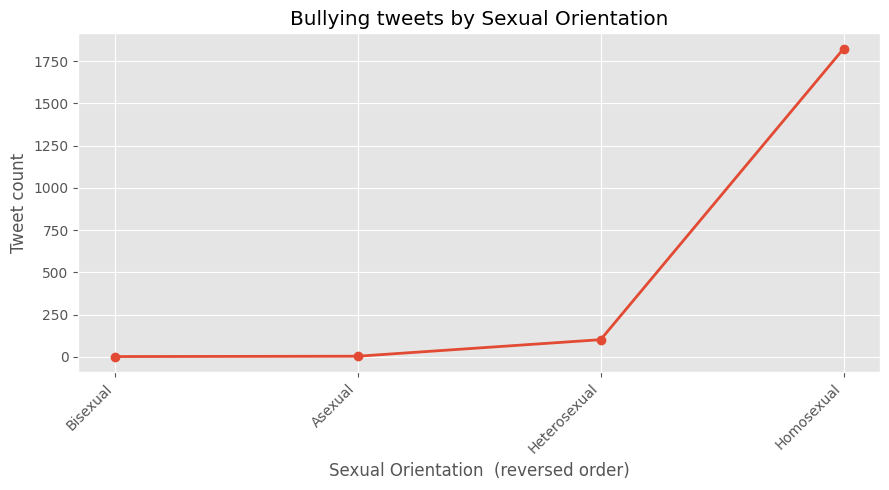

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# ── 1. Load & keep only bullying rows ─────────────────────────
df = pd.read_csv("final_hateXplain.csv")
df = df[df["label"].isin(["offensive", "hatespeech"])]      # combine as “bullying”

# drop placeholders + “other”
so_drop = {"none", "na", "n_a", "unknown", "no_orientation", "other", ""}
df = df[~df["Sexual Orientation"].str.lower()
                      .str.replace(" ", "_")
                      .isin(so_drop)]

# ── 2. Count tweets per orientation ──────────────────────────
so_counts = (
    df["Sexual Orientation"]
      .value_counts()            # absolute counts
      .sort_values(ascending=False)
)

# reverse the order → Homosexual … Bisexual
orientations = so_counts.index[::-1]      # simply flip the index
counts       = so_counts.loc[orientations]

# ── 3. Line chart with reversed x-axis order ─────────────────
plt.figure(figsize=(9,5))
plt.plot(orientations, counts, marker="o", linewidth=2)
plt.title("Bullying tweets by Sexual Orientation")
plt.xlabel("Sexual Orientation  (reversed order)")
plt.ylabel("Tweet count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

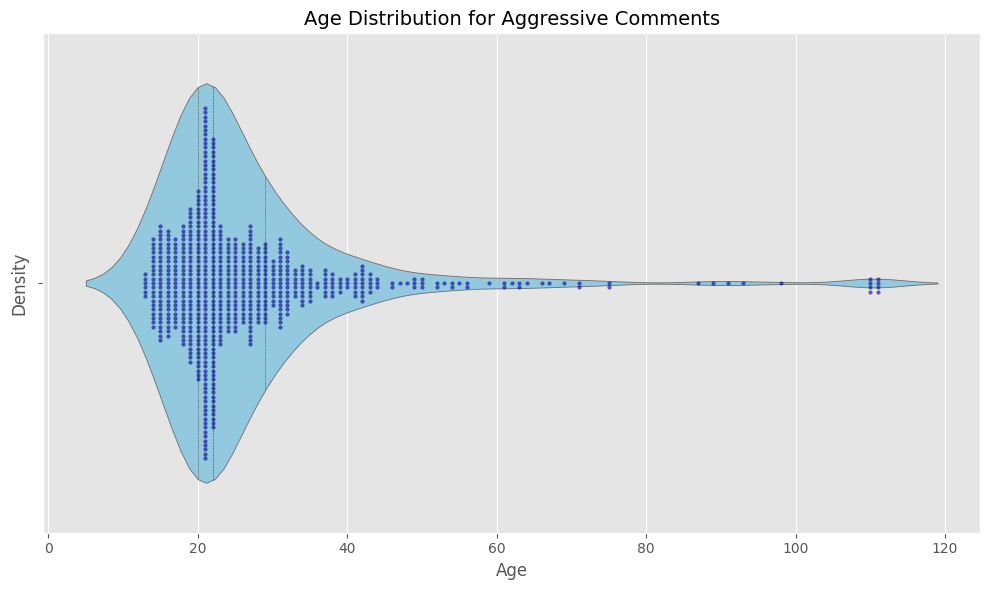

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── 1. Load data & keep aggressive rows ───────────────────────────────
df = pd.read_csv("youtube_parsed_dataset_sentiment.csv")
df_aggressive = df[df["sentiment_class"] == "Aggressive"].copy()

# ── 2. Age-distribution plot (violin + swarm) ─────────────────────────
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_aggressive["Age"], color="skyblue", inner="quartile")
sns.swarmplot(x=df_aggressive["Age"], color="darkblue", size=3, alpha=0.6)

plt.title("Age Distribution for Aggressive Comments", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()

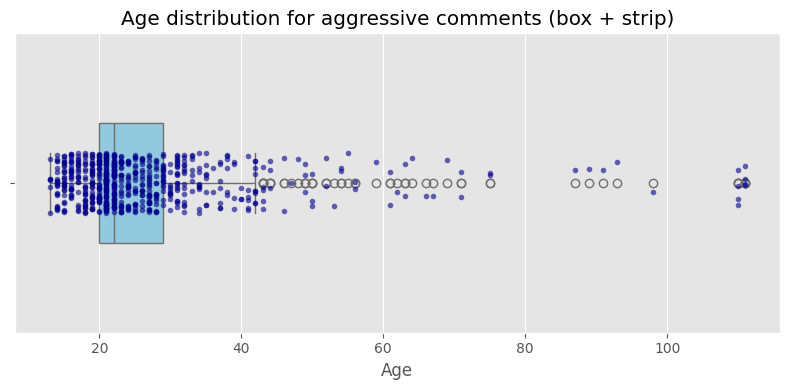

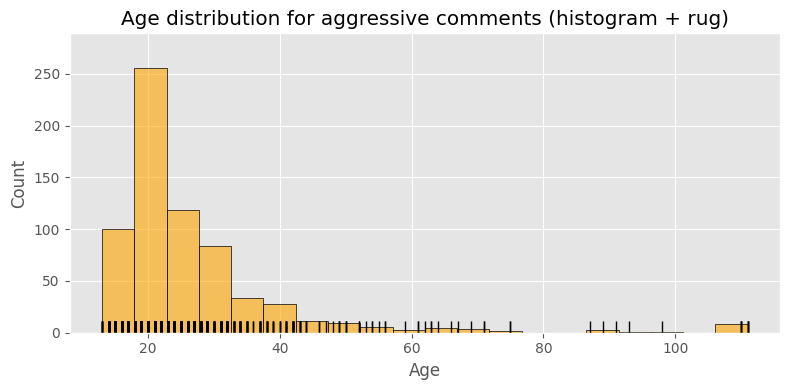

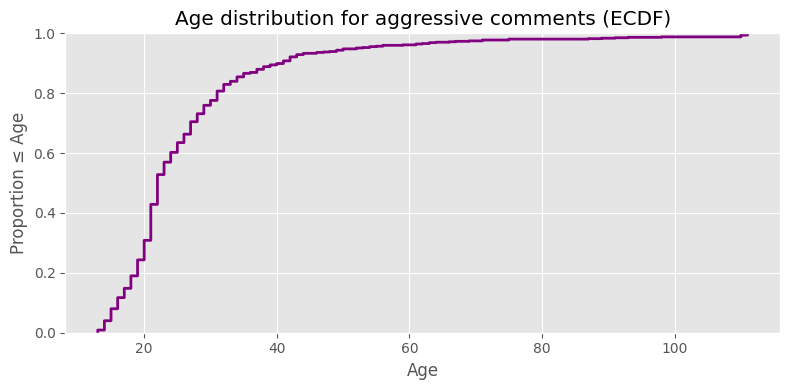

ModuleNotFoundError: No module named 'joypy'